In [22]:
import numpy as np
import pandas as pd
import pickle
from time import time
import matplotlib.pyplot as plt

In [4]:
with open('datapath.txt','r') as f:
    datapath=f.readlines()[0].rstrip()

In [73]:
# In[2]:

with open('catcount.pkl','r') as f:
    floatstats, intcount = pickle.load(f)


# In[6]:

splitpath=datapath+'SplitFiles/'

# In[3]:

intcount={i.index.name:i for i in intcount}




traindtypes=pd.read_csv(splitpath+'0_split_train.csv',nrows=10,parse_dates=False).dtypes.to_dict()
traindtypes['Semana']=np.uint8



# In[7]:

columns=['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK',
       'Cliente_ID', 'Producto_ID', 'Demanda_uni_equil']

kwargs={'parse_dates':False,'dtype':traindtypes,'usecols':columns}

In [8]:
train=pd.read_csv(splitpath+'0_split_train.csv', **kwargs)['Cliente_ID']

In [9]:
train.shape

(185599,)

In [10]:
Clientes=pd.read_csv(datapath+'cliente_tabla.csv.zip',usecols=['Cliente_ID']).drop_duplicates().values.flatten()

In [12]:
Clientes.shape

(930500,)

In [13]:
train=train.astype('category', categories=Clientes.tolist())

In [18]:
def n_cutoff(s,counts,n):
    if s.cat.categories.shape[0]<=n:
        return None
    else:
        counts=counts.sort_values(ascending=False)
        #print(s.name)
        drop_cats=set(counts.iloc[n:].index.tolist())
        #print(len(drop_cats))
        drop_cats=list(drop_cats.intersection(set(s.cat.categories.tolist())))
        #print(len(drop_cats))
        s.cat.remove_categories(drop_cats,inplace=True)

In [17]:
with open('Cliente_ID_Stats.pkl','r') as f:
    cuenta_Cliente=pickle.load(f)
    

In [39]:
def time_dummies(n):
    X=train.copy()
    n_cutoff(X,cuenta_Cliente,n)
    print(X.cat.categories.shape)
    t0=time()
    pd.get_dummies(X,sparse=True)
    return time()-t0

In [ ]:
timevcats=pd.Series({i:time_dummies(i) for i in xrange(50,5000,50)})

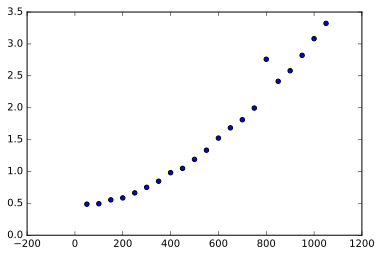

In [41]:
plt.scatter(timevncats.keys(),timevncats.values())

In [40]:
timevncats={i:time_dummies(i) for i in xrange(50,1100,50)}

(50,)
(100,)
(150,)
(200,)
(250,)
(300,)
(350,)
(400,)
(450,)
(500,)
(550,)
(600,)
(650,)
(700,)
(750,)
(800,)
(850,)
(900,)
(950,)
(1000,)
(1050,)


In [27]:
timevncats.update(moretvc)

In [28]:
timevncats

{50: 0.06870889663696289,
 100: 0.11087679862976074,
 150: 0.1880331039428711,
 200: 0.17403388023376465,
 250: 0.2920100688934326,
 300: 0.4636268615722656,
 350: 0.310305118560791,
 400: 0.33182501792907715,
 450: 0.37873101234436035,
 500: 0.32767510414123535,
 550: 0.36246514320373535,
 600: 0.48213911056518555,
 650: 0.40746307373046875,
 700: 0.46927690505981445,
 750: 0.4809730052947998,
 800: 0.5149619579315186,
 850: 0.5299489498138428,
 900: 0.5647108554840088,
 950: 0.7323729991912842,
 1000: 0.7097680568695068,
 1050: 0.6829299926757812}

In [43]:
timevncats=pd.Series(timevncats)

In [31]:
from statsmodels.api import OLS

In [49]:
X=pd.DataFrame([timevncats.index.to_series(),timevncats.index.to_series()**2],index='x x**2'.split()).T

In [89]:
X

,x,x**2
0,50,2500
1,100,10000
2,150,22500
3,200,40000
4,250,62500
5,300,90000
6,350,122500
7,400,160000
8,450,202500
9,500,250000


In [59]:
OLS?

In [64]:
import statsmodels.api as sm

In [83]:
ols=OLS(GI335[1],sm.add_constant(X))

In [84]:
ols=ols.fit()

In [85]:
ols.fittedvalues

0      0.675864
1      0.669178
2      0.676998
3      0.699323
4      0.736155
5      0.787492
6      0.853335
7      0.933683
8      1.028538
9      1.137898
10     1.261764
11     1.400136
12     1.553013
13     1.720396
14     1.902285
15     2.098680
16     2.309581
17     2.534987
18     2.774899
19     3.029317
20     3.298241
21     3.581670
22     3.879605
23     4.192046
24     4.518993
25     4.860445
26     5.216404
27     5.586868
28     5.971837
29     6.371313
30     6.785294
31     7.213781
32     7.656774
33     8.114273
34     8.586277
35     9.072787
36     9.573803
37    10.089325
38    10.619352
39    11.163886
40    11.722925
41    12.296469
42    12.884520
43    13.487076
44    14.104138
45    14.735706
46    15.381780
47    16.042359
48    16.717444
dtype: float64

In [86]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Fri, 17 Jun 2016   Prob (F-statistic):           2.02e-62
Time:                        17:11:24   Log-Likelihood:                 3.8621
No. Observations:                  49   AIC:                            -1.724
Df Residuals:                      46   BIC:                             3.951
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6971      0.103      6.761      0.000         0.490     0.905
x             -0.0006      0.000     -2.990      0.004        -0.001    -0.000
x**2        2.901e-06   7.38e-08     39.324      0.000      2.75e-06  3.05e-06
==============================================================================
Omnibus:                       15.523   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.608
Skew:                          -1.163   Prob(JB):                     9.11e-05
Kurtosis:                       4.924   Cond. No.                     8.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const               1
x              900000
x**2     810000000000
dtype: int64

In [93]:
sm.add_constant(X).loc[0]

const       1
x          50
x**2     2500
Name: 0, dtype: int64

In [96]:
ols.predict(pd.Series({'const':1,'x':900000,'x**2':900000**2}))/60/60/24

array([ 27.19239652])

In [77]:
GI335=pd.read_csv('time_to_dummify.csv',header=None)

In [91]:
GI335[1].sum()

292.50891065602599

<function matplotlib.pyplot.show>

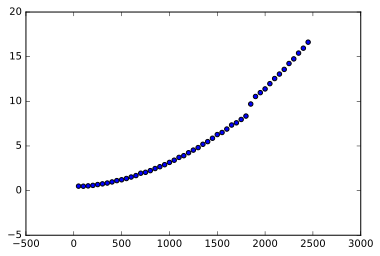

In [80]:
plt.scatter(GI335[0],GI335[1])
plt.show

In [82]:
X=pd.DataFrame([GI335[0],GI335[0]**2],index='x x**2'.split()).T